In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
datafile = 'Stroke_Dataset_Normalized.csv'
strokeDataSet = pd.read_csv(datafile)
strokeDataSet

,Unnamed: 0,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,classification
0,0,1.0,0.816895,0.0,1.0,1.0,0.25,1.0,0.801265,0.301260,0.333333,1
1,1,1.0,0.975586,0.0,1.0,1.0,0.25,0.0,0.234512,0.254296,0.000000,1
2,2,0.0,0.597168,0.0,0.0,1.0,0.25,1.0,0.536008,0.276060,0.666667,1
3,3,0.0,0.963379,1.0,0.0,1.0,1.00,0.0,0.549349,0.156930,0.000000,1
4,4,1.0,0.987793,0.0,0.0,1.0,0.25,1.0,0.605161,0.214204,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4903,4904,0.0,0.157715,0.0,0.0,0.0,0.75,0.0,0.221402,0.095074,1.000000,0
4904,4905,0.0,0.987793,0.0,0.0,1.0,1.00,1.0,0.323516,0.340206,0.000000,0
4905,4906,0.0,0.426270,0.0,0.0,1.0,1.00,0.0,0.128658,0.232532,0.000000,0
4906,4907,1.0,0.621582,0.0,0.0,1.0,0.25,0.0,0.513203,0.175258,0.333333,0


In [3]:
features = pd.DataFrame
features = strokeDataSet.drop(['stroke'], axis = 1)
features.head(10)
npFeatures = np.array(features)
npFeatures

KeyError: "['stroke'] not found in axis"

In [ ]:
classification = pd.DataFrame
classification = strokeDataSet[['stroke']].copy()
classification.head(10)
npClassification = np.array(classification)
npClassification

In [5]:
# shuffle the dataset when creating the training and testing set using the random state value 25
# by setting it to a value the dataset can be reproduced
x_training, x_testing, y_training, y_testing = train_test_split(npFeatures, npClassification, test_size=0.3, random_state=25)

In [6]:
x_training.shape, x_testing.shape, y_training.shape, y_testing.shape

((3435, 10), (1473, 10), (3435, 1), (1473, 1))

## Gaussian Naive Bayes

In [7]:
naiveGB = GaussianNB()
naiveGB

GaussianNB()

In [8]:
y_training_flat = y_training.flatten()

In [9]:
naiveGB.fit(x_training, y_training_flat)
naivePrediction = naiveGB.predict(x_testing)
print("Accuracy of Prediction: {}%".format(accuracy_score(y_testing, naivePrediction)*100))

Accuracy of Prediction: 87.16904276985743%


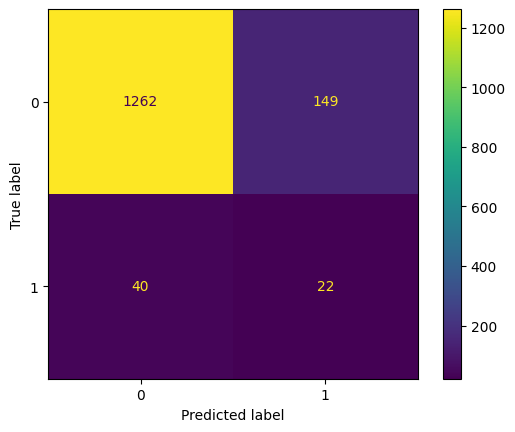

array([[1262,  149],
       [  40,   22]], dtype=int64)

In [51]:
cm = confusion_matrix(y_testing, naivePrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
cm

## Logistic Regression

In [10]:
logi = LogisticRegression()
logi

LogisticRegression()

In [33]:
logi.fit(x_training, y_training_flat)
logiPrediction = logi.predict(x_testing)
print("Accuracy of Prediction: {}%".format(accuracy_score(y_testing, logiPrediction)*100))

Accuracy of Prediction: 95.85879158180583%


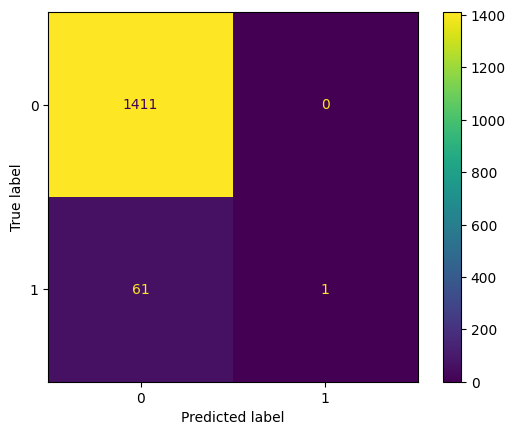

In [34]:
cm = confusion_matrix(y_testing, logiPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Decision Tree

In [12]:
deciTree = DecisionTreeClassifier()
deciTree

DecisionTreeClassifier()

In [32]:
deciTree.fit(x_training, y_training_flat)
deciPrediction = deciTree.predict(x_testing)
print("Accuracy of Prediction: {}%".format(accuracy_score(y_testing, deciPrediction)*100))

Accuracy of Prediction: 91.10658520027155%


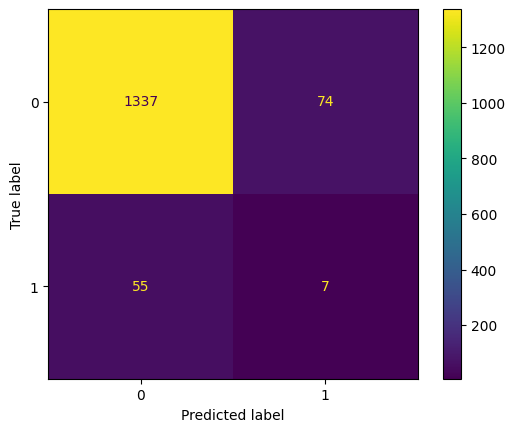

In [31]:
cm = confusion_matrix(y_testing, deciPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Random Forest

In [14]:
randClass = RandomForestClassifier()
randClass

RandomForestClassifier()

In [15]:
randClass.fit(x_training, y_training_flat)
randPrediction = randClass.predict(x_testing)
print("Accuracy of Prediction: {}%".format(accuracy_score(y_testing, randPrediction)*100))

Accuracy of Prediction: 95.6551255940258%


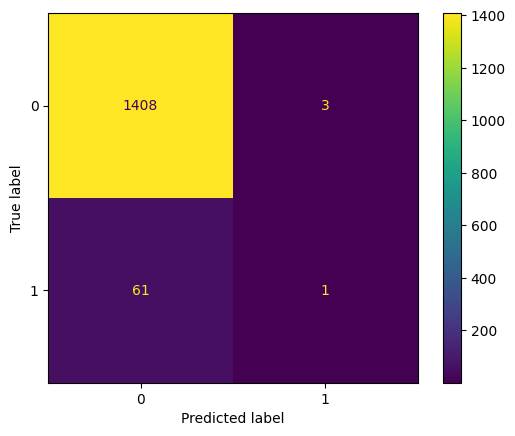

In [39]:
cm = confusion_matrix(y_testing, randPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## K - Nearest Neighbor

In [16]:
kNearest = KNeighborsClassifier()
kNearest

KNeighborsClassifier()

In [17]:
kNearest.fit(x_training, y_training_flat)
kNearestPrediction = kNearest.predict(x_testing)
print("Accuracy of Prediction: {}%".format(accuracy_score(y_testing, kNearestPrediction)*100))

Accuracy of Prediction: 95.72301425661914%


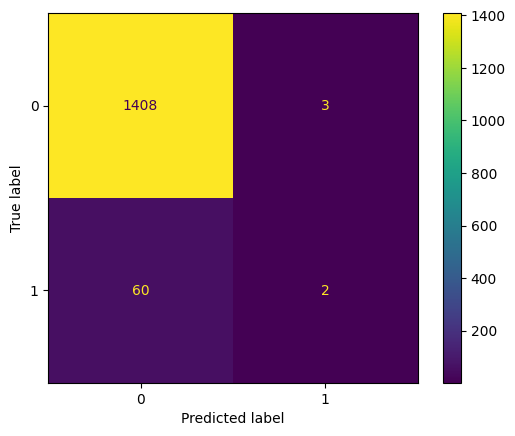

In [46]:
cm = confusion_matrix(y_testing, kNearestPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Linear SVM

In [18]:
linearSVM = LinearSVC()
linearSVM

LinearSVC()

In [19]:
linearSVM.fit(x_training, y_training_flat)
linearSVMPrediction = linearSVM.predict(x_testing)
print("Accuracy of Prediction: {}%".format(accuracy_score(y_testing, linearSVMPrediction)*100))

Accuracy of Prediction: 95.7909029192125%


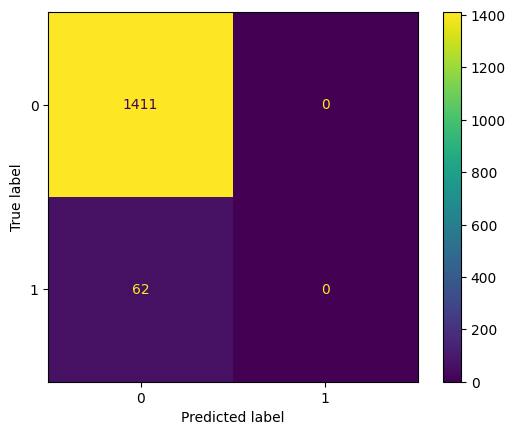

In [41]:
cm = confusion_matrix(y_testing, linearSVMPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## SVM

In [20]:
svm = SVC()
svm

SVC()

In [21]:
svm.fit(x_training, y_training_flat)
svmPrediction = svm.predict(x_testing)
print("Accuracy of Prediction: {}%".format(accuracy_score(y_testing, svmPrediction)*100))

Accuracy of Prediction: 95.7909029192125%


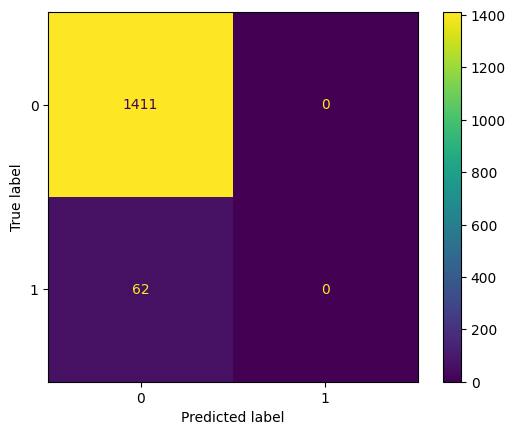

In [42]:
cm = confusion_matrix(y_testing, svmPrediction)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Accuracies

In [22]:
print("Decision Tree:           {}%".format(accuracy_score(y_testing, deciPrediction)*100))
print("Gaussian Naive Bayes:    {}%".format(accuracy_score(y_testing, naivePrediction)*100))
print("K Nearest Neighbor:      {}%".format(accuracy_score(y_testing, kNearestPrediction)*100))
print("Linear SVM:              {}%".format(accuracy_score(y_testing, linearSVMPrediction)*100))
print("Logistic Regression:     {}%".format(accuracy_score(y_testing, logiPrediction)*100))
print("Random Forest:           {}%".format(accuracy_score(y_testing, randPrediction)*100))
print("SVM:                     {}%".format(accuracy_score(y_testing, svmPrediction)*100))

Decision Tree:           91.0386965376782%
Gaussian Naive Bayes:    87.16904276985743%
K Nearest Neighbor:      95.72301425661914%
Linear SVM:              95.7909029192125%
Logistic Regression:     95.85879158180583%
Random Forest:           95.6551255940258%
SVM:                     95.7909029192125%
